# Group Analysis

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
process = 'Group_Analysis'
top_path = '/Users/emcmaho7/Dropbox/projects/SI_EEG/SIEEG_analysis'
input_path = f'{top_path}/data/interim/EEG_RSA'
out_path = f'{top_path}/data/interim/{process}'
figure_path = f'{top_path}/reports/figures/{process}'
Path(out_path).mkdir(parents=True, exist_ok=True)
Path(figure_path).mkdir(parents=True, exist_ok=True)

In [3]:
rois = ['EVC', 'MT', 'EBA',
        'LOC', 'FFA', 'PPA',
        'pSTS', 'face-pSTS', 'aSTS']
features = ['indoor', 'expanse', 'object_directedness',
                 'agent_distance', 'facingness', 'joint_action',
                 'communication', 'valence', 'arousal']

In [4]:
def load_files(files, cat=None, cat_order=None):
    group = []
    for file in files:
        subj = file.split('/')[-1].split('_')[0]
        df = pd.read_csv(file)
        df['subj'] = subj
        if 'Unnamed: 0' in df.columns:
            df.drop(columns=['Unnamed: 0'], inplace=True)
        group.append(df)
    group = pd.concat(group)
    if cat and cat_order:
        cat_type = pd.CategoricalDtype(categories=cat_order, ordered=True)
        group[cat] = group[cat].astype(cat_type)
    return group

In [5]:
pairwise_decoding = load_files(glob(f'{input_path}/*pairwise-decoding.csv'))
feature_rsa = load_files(glob(f'{input_path}/*feature-rsa.csv'),
                         cat='feature', cat_order=features)
fMRI_rsa = load_files(glob(f'{input_path}/*fMRI-rsa.csv'),
                      cat='roi', cat_order=rois)

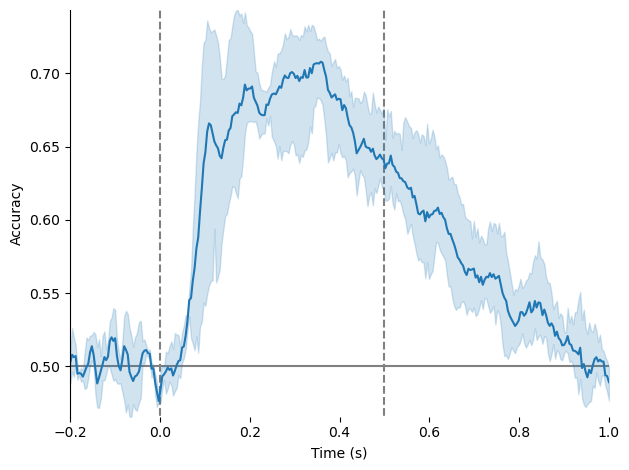

In [6]:
decoding_avg = pairwise_decoding.groupby(['time', 'subj']).mean(numeric_only=True).reset_index()
feature_group = feature_rsa.groupby('feature')
_, ax = plt.subplots()
ymin, ymax = decoding_avg['accuracy'].min(), decoding_avg['accuracy'].max()
sns.lineplot(x='time', y='accuracy', data=decoding_avg, ax=ax)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Time (s)')     
ax.vlines(x=[0, 0.5], ymin=0, ymax=ymax,
        colors='gray', linestyles='dashed', zorder=0)
ax.hlines(y=0.5, xmin=decoding_avg.time.min(), xmax=decoding_avg.time.max(),
        colors='gray', linestyles='solid', zorder=0)
ax.set_xlim([decoding_avg.time.min(), decoding_avg.time.max()])
ax.set_ylim([ymin, ymax])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.savefig(f'{figure_path}/pairwise-decoding.png')

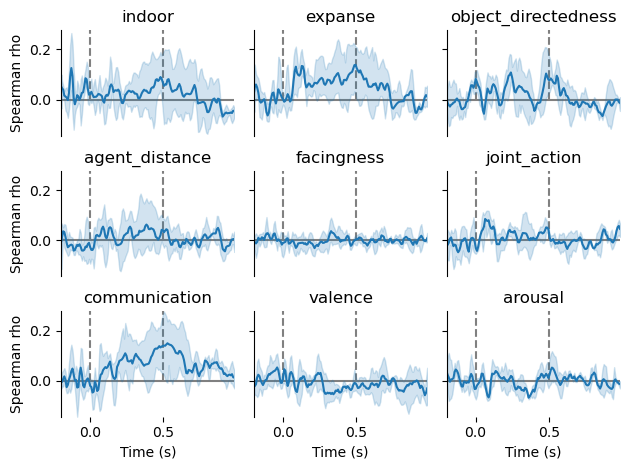

In [7]:
feature_group = feature_rsa.groupby('feature')
_, axes = plt.subplots(3, 3, sharey=True, sharex=True)
axes = axes.flatten()
ymin, ymax = feature_rsa['Spearman rho'].min(), feature_rsa['Spearman rho'].max()
for ax, (feature, time_corr) in zip(axes, feature_group):
    sns.lineplot(x='time', y='Spearman rho', data=time_corr, ax=ax)
    if feature in ['indoor', 'agent_distance', 'communication']:
        ax.set_ylabel('Spearman rho')
    else:
        ax.set_ylabel('')
        
    if feature in ['communication', 'valence', 'arousal']:
        ax.set_xlabel('Time (s)')
    else:
        ax.set_xlabel('')
        ax.tick_params(axis='x', which='both', length=0)
    ax.vlines(x=[0, 0.5], ymin=0, ymax=ymax,
            colors='gray', linestyles='dashed', zorder=0)
    ax.hlines(y=0, xmin=time_corr.time.min(), xmax=time_corr.time.max(),
            colors='gray', linestyles='solid', zorder=0)
    ax.set_xlim([time_corr.time.min(), time_corr.time.max()])
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(feature)
plt.tight_layout()
plt.savefig(f'{figure_path}/feature-rsa.png')

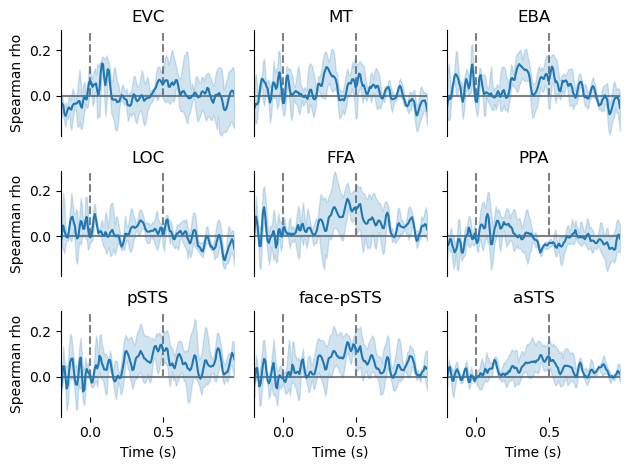

In [8]:
roi_group = fMRI_rsa.groupby('roi')
_, axes = plt.subplots(3, 3, sharey=True, sharex=True)
axes = axes.flatten()
ymin, ymax = fMRI_rsa['Spearman rho'].min(), fMRI_rsa['Spearman rho'].max()
for ax, (roi, roi_corr) in zip(axes, roi_group):
    sns.lineplot(x='time', y='Spearman rho', data=roi_corr, ax=ax)
    if roi in ['EVC', 'LOC', 'pSTS']:
        ax.set_ylabel('Spearman rho')
    else:
        ax.set_ylabel('')

    if roi in ['pSTS', 'face-pSTS', 'aSTS']:
        ax.set_xlabel('Time (s)')
    else:
        ax.set_xlabel('')
        ax.tick_params(axis='x', which='both', length=0)

    ax.vlines(x=[0, 0.5], ymin=0, ymax=ymax,
            colors='gray', linestyles='dashed', zorder=0)
    ax.hlines(y=0, xmin=roi_corr.time.min(), xmax=roi_corr.time.max(),
            colors='gray', linestyles='solid', zorder=0)
    ax.set_xlim([roi_corr.time.min(), roi_corr.time.max()])
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(roi)
plt.tight_layout()
plt.savefig(f'{figure_path}/fMRI-rsa.png')